# CSE 572: Homework 2

This notebook provides a template and starting code to implement the Homework 2 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Prepare the dataset

In this homework, you will compare the effect of multiple dimensionality reduction techniques on the classification performance for the [Covertype dataset](https://archive.ics.uci.edu/ml/datasets/Covertype).  The classification task for this dataset is to predict the forest cover type of a 30 m x 30 m patch of forested land described by 54 attributes. The attributes include features such as elevation, aspect, slope, soil characteristics, etc. The dataset was created by the Department of Forest Sciences at Colorado State University and the US Forest Service in 1998. 

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_covtype
import numpy as np

seed = 0
np.random.seed(seed)

dataset = fetch_covtype(as_frame=True)

data = dataset.data
labels = dataset.target

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
data.sample(10, random_state= seed)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
215988,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424155,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274437,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65944,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11015,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85781,2656.0,20.0,9.0,323.0,73.0,1082.0,214.0,221.0,143.0,1036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505270,2992.0,105.0,36.0,201.0,141.0,1211.0,252.0,170.0,12.0,1584.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169233,3110.0,32.0,14.0,379.0,43.0,5028.0,216.0,208.0,125.0,2845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373091,3242.0,40.0,15.0,85.0,19.0,3330.0,220.0,207.0,118.0,3164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181345,3025.0,273.0,10.0,391.0,24.0,2797.0,192.0,243.0,190.0,234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [ ]:
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

## Dimensionality reduction

You will implement 2 dimensionality reduction techniques:
- PCA (linear)
- Autoencoder neural network (non-linear)

For PCA, you will create a plot of the total fraction of explained variance by the first 1 through 10 principal components (as we did in Lab 11). Choose the number of principal components to retain based on the inflection point of this plot, i.e., the point at which the increase in total explained variance begins to plateau (as we did in Lab 11).

For the autoencoder neural network, implement a network with the following layers:
1. Input layer (# units = 54) [encoder]
2. Hidden layer (# units = 32) [encoder]
3. Hidden layer (# units = number of PCs retained for PCA) [encoded/bottleneck layer]
4. Hidden layer (# units = 32) [decoder]
5. Output layer (# units = 54) [decoder]

For example, if you chose to use 3 principal components in PCA, you will have a bottleneck layer of 3 units in your autoencoder. 

Use ‘relu’ activation for hidden layers and ‘sigmoid’ activation for the output layer, ‘sgd’ (stochastic gradient descent) for the optimizer, and ‘mse’ (mean squared error) as the loss function. Train your model for 100 epochs with a batch size of 64. Lab 12 will be a useful guide for this implementation. Note that you will use the predict() function with only the encoder part of the model to transform your features into the encoded (reduced-dimension) representation.

In [ ]:
X = data
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = labels
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [ ]:
# YOUR CODE HERE
n_classes = len(label_names)

In [ ]:
print('Num classes: {}'.format(n_classes))
print('Class names:', label_names)

Num classes: 7
Class names: ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']


In [ ]:
for i,x in enumerate(label_names):
  print("Number of instances with ID {} and name {} are {}".format(i+1,x,y[y==i+1].shape[0]))

Number of instances with ID 1 and name Spruce/Fir are 211840
Number of instances with ID 2 and name Lodgepole Pine are 283301
Number of instances with ID 3 and name Ponderosa Pine are 35754
Number of instances with ID 4 and name Cottonwood/Willow are 2747
Number of instances with ID 5 and name Aspen are 9493
Number of instances with ID 6 and name Douglas-fir are 17367
Number of instances with ID 7 and name Krummholz are 20510


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

num_components = 10

pca = PCA(n_components=num_components).fit(X_train)

In [ ]:
for i in range(num_components):
    print('Percentage of variance explained by PC {}: {}'.format(i+1, sum(pca.explained_variance_ratio_[:i+1])))
    
print('Total variance explained by 10 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

Percentage of variance explained by PC 1: 0.06854496304811446
Percentage of variance explained by PC 2: 0.12269861693887907
Percentage of variance explained by PC 3: 0.16708499668943083
Percentage of variance explained by PC 4: 0.2040771992254682
Percentage of variance explained by PC 5: 0.23188082225176643
Percentage of variance explained by PC 6: 0.2581345746577982
Percentage of variance explained by PC 7: 0.27996127487738787
Percentage of variance explained by PC 8: 0.30089382619578847
Percentage of variance explained by PC 9: 0.3209081792096988
Percentage of variance explained by PC 10: 0.3403018585491706
Total variance explained by 10 PCs: 0.34030185854917067


Text(0.5, 0, 'Number of principal components')

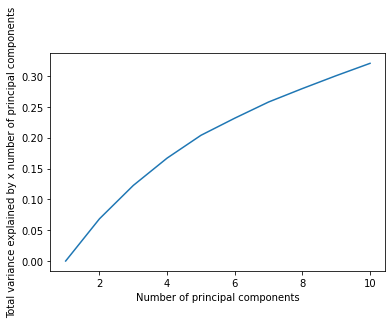

In [ ]:
import matplotlib.pyplot as plt
pca_explained_variance_ratio_sum=[]
num_principal_components = range(1,11)
for i in range(num_components):
  pca_explained_variance_ratio_sum.append(np.sum(pca.explained_variance_ratio_[0:i]))
plt.plot(num_principal_components,pca_explained_variance_ratio_sum)
plt.ylabel('Total variance explained by x number of principal components')
plt.xlabel('Number of principal components')

In [ ]:
# Choosing the number of principal components to retain as 4 based on the inflection point of the plot
n_components = 4

In [ ]:
in_pca = PCA(n_components= n_components).fit(X_train)

X_train_pca = in_pca.transform(X_train)
X_test_pca = in_pca.transform(X_test)

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = n_components

# This is our input 
input = keras.Input(shape=(X_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(54, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(54, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

In [ ]:
encoder = keras.Model(input, encoded)

In [ ]:
autoencoder.compile(optimizer='sgd', loss='mse')

In [ ]:
autoencoder.fit(x=X_train, y=X_train,
               epochs=100,
               batch_size=64,
               shuffle=True)

Epoch 1/100
6355/6355 [==============================] - 18s 2ms/step - loss: 1.0665
Epoch 2/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9913
Epoch 3/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9668
Epoch 4/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9566
Epoch 5/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9506
Epoch 6/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9439
Epoch 7/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9354
Epoch 8/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9295
Epoch 9/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9251
Epoch 10/100
6355/6355 [==============================] - 13s 2ms/step - loss: 0.9218
Epoch 11/100
6355/6355 [==============================] - 11s 2ms/step - loss: 0.9174
Epoch 12/100
6355/6355 [==============================] - 11s 2

In [ ]:
from keras import Sequential

X_train_ae = encoder.predict(X_train)
X_test_ae = encoder.predict(X_test)

5447/5447 [==============================] - 8s 1ms/step


## Classification

You will use a Random Forest classifier with 100 trees for the classification model (using Scikit-learn). Leave all other hyperparameters as their default values. You will train 3 separate random forest classifiers with 1) input data transformed using PCA, 2) input data transformed using autoencoder, 3) no dimensionality reduction (original data attributes).

In [ ]:
# YOUR CODE HERE
from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [ ]:
rf_pca = ensemble.RandomForestClassifier(n_estimators=100)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

In [ ]:
rf_ae = ensemble.RandomForestClassifier(n_estimators=100)
rf_ae.fit(X_train_ae, y_train)

RandomForestClassifier()

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

Your final model evaluation should be performed on the test set. You will compare the results of the two dimensionality reduction + Random Forest methods (PCA + RF, Autoencoder + RF) as well as a baseline Random Forest classifier that does not use any dimensionality reduction (the original attributes will be the input feature vector). For each of the 3 methods, print the classification report (including class-wise precision, recall, F1 + overall accuracy) and plot the confusion matrix. 

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import classification_report

In [ ]:
y_pred_rf_pca = rf_pca.predict(X_test_pca)
y_pred_rf_ae = rf_ae.predict(X_test_ae)
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           1       0.77      0.72      0.74     63498
           2       0.77      0.84      0.80     85198
           3       0.73      0.79      0.76     10581
           4       0.73      0.53      0.61       822
           5       0.71      0.31      0.43      2850
           6       0.64      0.50      0.57      5229
           7       0.83      0.65      0.73      6126

    accuracy                           0.76    174304
   macro avg       0.74      0.62      0.66    174304
weighted avg       0.76      0.76      0.76    174304



In [ ]:
print(classification_report(y_test, y_pred_rf_ae))

              precision    recall  f1-score   support

           1       0.72      0.68      0.70     63498
           2       0.73      0.80      0.76     85198
           3       0.63      0.70      0.66     10581
           4       0.45      0.22      0.30       822
           5       0.49      0.21      0.29      2850
           6       0.52      0.36      0.43      5229
           7       0.75      0.60      0.67      6126

    accuracy                           0.72    174304
   macro avg       0.62      0.51      0.55    174304
weighted avg       0.71      0.72      0.71    174304



In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63498
           2       0.95      0.97      0.96     85198
           3       0.94      0.96      0.95     10581
           4       0.92      0.83      0.87       822
           5       0.95      0.77      0.85      2850
           6       0.93      0.90      0.91      5229
           7       0.97      0.95      0.96      6126

    accuracy                           0.95    174304
   macro avg       0.95      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

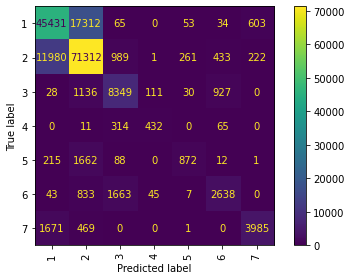

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    rf_pca, X_test_pca, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

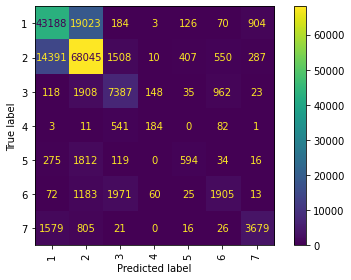

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    rf_ae, X_test_ae, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

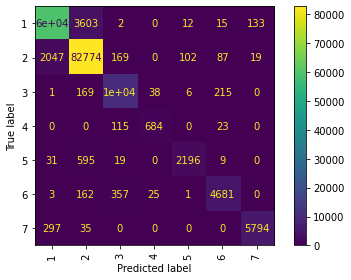

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

Discussion:
Random forest without dimensionality reduction gives the best performance(accuracy = 0.95) followed by dimensionality reduction of PCA with RF(accuracy = 0.76) followed by dimensionality reduction of autoencoder with RF (accuracy = 0.72)